### Classification Model of Music Genre by Audio Features
- Reduce the dimension of the feature space in such a way that new variables are orthogonal to each other
- Source code: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- **Target Variable = SimpleGenre**

In [1]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data
%store -r musicbeats_encoded
%store -r genre_strings

musicbeats_encoded.head()

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature,SimpleGenres
0,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,282920.0,4.0,11
1,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,300320.0,4.0,11
2,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,175353.0,4.0,11
3,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,272292.0,4.0,11
4,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,237933.0,4.0,11


In [3]:
target_num_array = np.unique(musicbeats_encoded['SimpleGenres'])
target_num_array

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19], dtype=int8)

## Learning
- Model Selection
    - Cross-Validation
    - Performance Metrics
    - Hyperparameter Optimization

In [4]:
# Import necessary modules
from sklearn.preprocessing import label_binarize

In [5]:
# Separate out the features
X = musicbeats_encoded.copy().drop(columns='SimpleGenres')

# Save feature column labels in list
feature_list = list(X.columns)

# Separate out the target
y = musicbeats_encoded['SimpleGenres'].values
print(y.shape)

# convert to binary variable
y_binary = label_binarize(y, classes=[0,1])[:,0]
print(y_binary.shape)

(131552,)
(131552,)


#### Testing and Training Data

In [6]:
# Import necessary modules 
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(92086, 39466, 92086, 39466)

#### Standardize the Feature Data

In [8]:
# Import necessary modules
from sklearn.preprocessing import StandardScaler

In [9]:
# Create a scaler instance
scaler = StandardScaler()

In [10]:
# Fit on training features set *only*
scaler.fit(X_train)

# Apply transform to both the feature training and the test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Show Training and Testing Data Set Shapes
print('Training (X) Features Shape:', X_train_scaled.shape)
print('Training (y) Target Shape:', y_train.shape)
print('Testing (X) Features Shape:', X_test_scaled.shape)
print('Testing (y) Target Shape:', y_test.shape)

Training (X) Features Shape: (92086, 13)
Training (y) Target Shape: (92086,)
Testing (X) Features Shape: (39466, 13)
Testing (y) Target Shape: (39466,)


#### Create a Random Decision Tree

In [12]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Instantiate model with 100 decision trees and max depth of 3
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)

# Train the model on training data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

*Make Predictions*

In [14]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test_scaled)

# Calculate the absolute errors 
# The difference between the measured or inferred value of a quantity x0 and its actual value x
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.02


In [15]:
# Predict for One Observation
print(rf.predict(X_test_scaled[0].reshape(1,-1)))

# Predict for One Observation
rf.predict(X_test_scaled[0:10])

[0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

*Visualize Tree*

In [16]:
# Import necessary modules
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot

In [17]:
# Extract the small tree
tree_small = rf.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

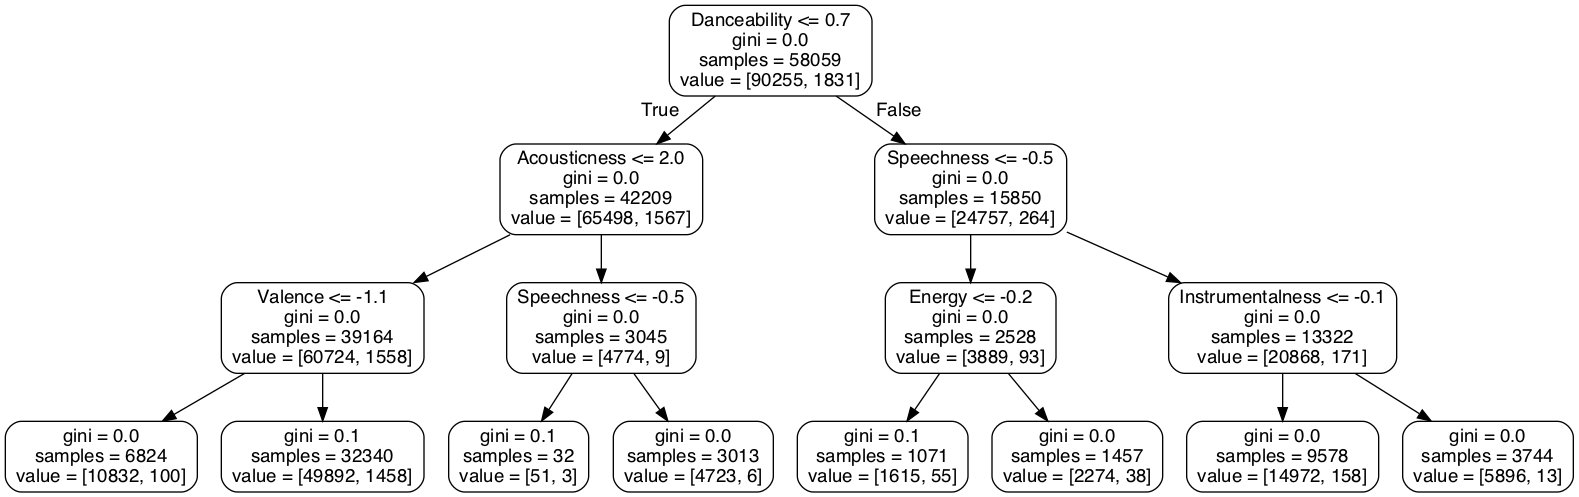

In [18]:
# Write graph to a png file
Image(graph.create_png())

*Observations*: According to this particular decision tree, 6 variables, 'Danceability', 'Acousticness', 'Speechness', 'Valence', 'Energy' and 'Instrumentalness', were required to separate the genres with a Mean Absolute Error of 2.0%. It is also worth noting that there are repeat splits of 'Speechness', once after the main split at 'Danceability', which appears to helps distinguish between two major classes of genre groups, and once within the left group of genre groups. 

### Create a K-Nearest Neighbors (kNN) Machine Learning Model
- non-parametric -> it does not make any assumptions on the underlying data distribution
- does not use the training data points to do any generalization
- can be used in a variety of applications, such as classification of genres

In [19]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

*Determine Optimal Number of Neighbors*

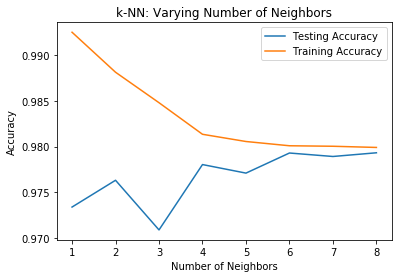

In [20]:
# Source code: https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification?ex=12

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

*Observations*: Choosing at least 6 neighbors will result in a more accurate KNN model.

In [21]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train_scaled, y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_train_scaled)

In [22]:
# Predict and print the label for the new data point X_test
new_prediction = knn.predict(X_test_scaled)
print("Prediction: {}".format(new_prediction))

Prediction: [0 0 0 ... 0 0 0]


In [23]:
# Print the accuracy
knn.score(X_test_scaled, y_test)

0.9790452541428065

*Observations*: The KNN model obtained a high accuracy score of ~97.9%.

#### View Model Percision with ROC curve

In [24]:
# Import necessary modules
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [25]:
# Calculate the probability of model's ability to predict a likely value of the features
test_prediction_probability = knn.predict_proba(X_test_scaled)[:,1]

# Calculate ROC accuracy score
logit_roc_auc = roc_auc_score(y_test, new_prediction)

# Calculate True Positive and False Positive rates
false_pr, true_pr, thresholds = roc_curve(y_test, test_prediction_probability)

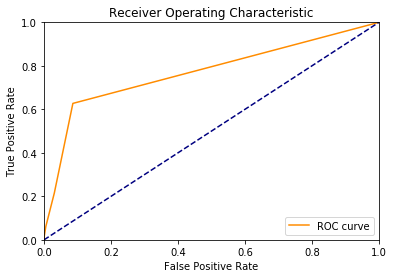

In [26]:
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(false_pr, true_pr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Conclusion**: The kNN classification model was successfully able to predict music genre based off of the audio features found in the dataset with 97.9% accuracy. However, it does seem odd that the ROC curve resulted in an equal ration of True(+) and False(+) rates.  

Further investigation into the procurement of the around audio features should be performed as their values and procurement were not heavily discussed in the Kaggle-sourced dataset. Until this is addressed, there is no way of determining if this model will accurately predict a music genre's by the same audio features if they are not recorded/converted/processed in the same manner. When sufficient proof has been made to support the claim that the audio feature extraction is repeatable, a less computationally dense classifier can replace the kNN model, such as SVM, Logistic Regression (Classification), or a combination in a neural network featuring several layers of classification and feature extraction as part of pipelined predictive model.

This model, when used in the manner described above, could be the music analyzer of a multi-dimensional music recommendation system that works in sync with additional datasets assessing how various users choose music genres.